In [1]:
import sys
sys.version

'3.11.5 (v3.11.5:cce6ba91b3, Aug 24 2023, 10:50:31) [Clang 13.0.0 (clang-1300.0.29.30)]'

In [2]:
!pip3 install torch
!pip3 install torchvision
!pip3 install matplotlib

In [3]:
import torch as t
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

### Model

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 10)
        self.relu = nn.ReLU()

    def forward(self, img): #convert + flatten
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        return x
net = Net()



### Hyperparams

In [5]:
batch_size=128
num_epochs=100
num_batches=100
loss_fn = nn.CrossEntropyLoss()
opti = 'SGD'
LR = 0.01
optimizer = t.optim.SGD(net.parameters(), lr=LR)

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True)

In [10]:
train_loader.dataset[0][0].shape

torch.Size([1, 28, 28])

### Training

In [11]:
def train_one_epoch(epoch_index):
    running_loss = 0.
    last_loss = 0.
    c = 0

    for i, data in enumerate(train_loader):
        # Every data instance is an input + label pair
        # data.shape=torch.Size([10, 3, 32, 32]) --> 10 images,labels
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = net(inputs.view(-1, 28*28))


        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()

        if i % num_batches == num_batches-1:
            last_loss = running_loss / num_batches # loss per num_batches batches
            print(' batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss

### Evaluate

In [13]:
def test(model, loader):
  total=0
  correct=0
  model.eval()
  with t.no_grad():
      for data in loader:
          x, y = data
          output = model(x.view(-1, 28*28))
          for idx, i in enumerate(output):
              if t.argmax(i) == y[idx]:
                  correct +=1
              total +=1
  return round(correct/total, 3)*100

In [14]:
epoch_number = 0

losses = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    net.train(True)
    avg_loss = train_one_epoch(epoch_number)
    losses.append(avg_loss)

    # Train accuracy
    train_acc = test(net, train_loader)
    train_accuracy.append(train_acc)

    # Test accuracy
    test_acc = test(net, test_loader)
    test_accuracy.append(test_acc)

    print('Train accuracy {}:'.format(train_acc))
    print('Test accuracy {}:'.format(test_acc))

    epoch_number += 1

EPOCH 1:
 batch 100 loss: 1.599555149078369
 batch 200 loss: 1.1707380348443985
 batch 300 loss: 1.059552041888237
 batch 400 loss: 0.993008348941803
Train accuracy 71.39999999999999:
Test accuracy 72.0:
EPOCH 2:
 batch 100 loss: 0.9426202124357224
 batch 200 loss: 0.9235123813152313
 batch 300 loss: 0.8965732705593109
 batch 400 loss: 0.8772267711162567
Train accuracy 72.39999999999999:
Test accuracy 72.89999999999999:
EPOCH 3:
 batch 100 loss: 0.8700804346799851
 batch 200 loss: 0.8606264847517013
 batch 300 loss: 0.8424062401056289
 batch 400 loss: 0.848087621331215
Train accuracy 72.89999999999999:
Test accuracy 73.3:
EPOCH 4:
 batch 100 loss: 0.8321205896139144
 batch 200 loss: 0.8088659554719925
 batch 300 loss: 0.691077880859375
 batch 400 loss: 0.6510795357823372
Train accuracy 81.10000000000001:
Test accuracy 81.6:
EPOCH 5:
 batch 100 loss: 0.63056112408638
 batch 200 loss: 0.6212520337104798
 batch 300 loss: 0.5956221804022789
 batch 400 loss: 0.6140210717916489
Train accurac

### Plotting

In [15]:
!pip3 install numpy
import numpy as np
epochs_arr = np.arange(0, len(losses))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


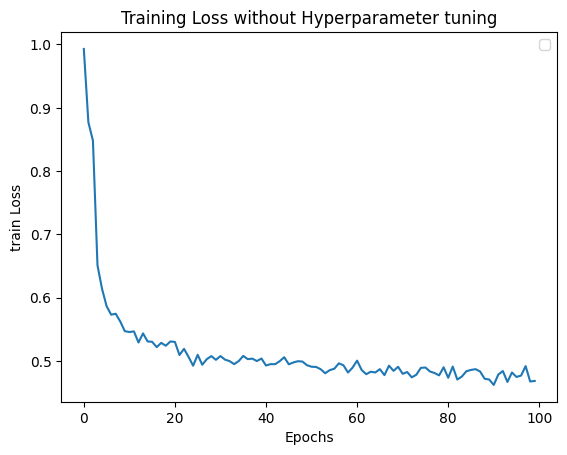

In [16]:
# Plot training loss
xpoints = np.array(epochs_arr)
ypoints = np.array(losses)

plt.plot(xpoints, ypoints)
plt.xlabel("Epochs")
plt.ylabel("train Loss")
plt.legend()
plt.title('Training Loss without Hyperparameter tuning')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


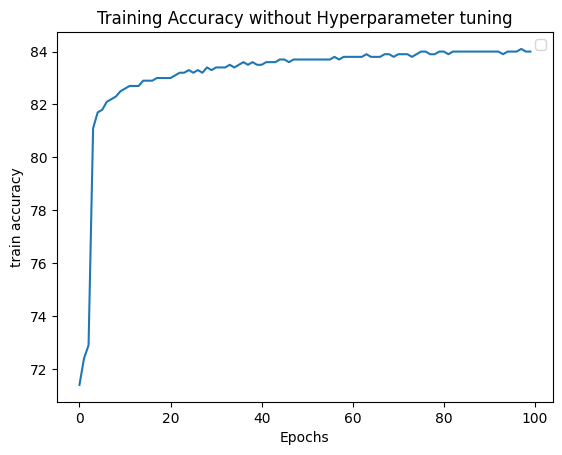

In [17]:
# Plot training accuracy
xpoints = np.array(epochs_arr)
ypoints = np.array(train_accuracy)

plt.plot(xpoints, ypoints)
plt.xlabel("Epochs")
plt.ylabel("train accuracy")
plt.legend()
plt.title('Training Accuracy without Hyperparameter tuning')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


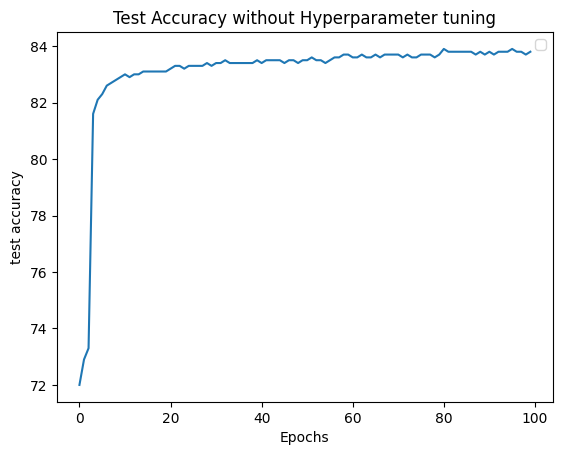

In [18]:
# Plot test accuracy
xpoints = np.array(epochs_arr)
ypoints = np.array(test_accuracy)

plt.plot(xpoints, ypoints)
plt.xlabel("Epochs")
plt.ylabel("test accuracy")
plt.legend()
plt.title('Test Accuracy without Hyperparameter tuning')
plt.show()

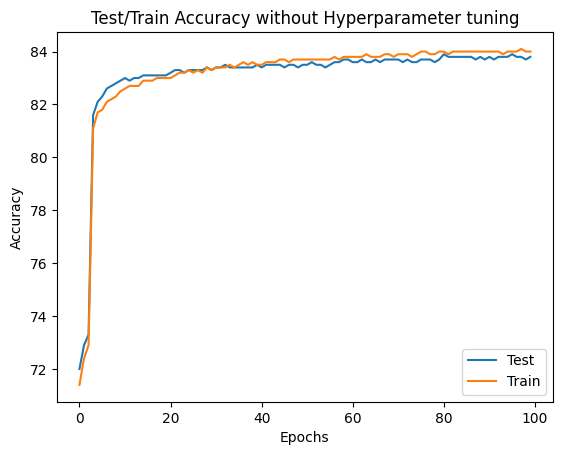

In [19]:
# Plot accuracy
xpoints = np.array(epochs_arr)
ypoints_test = np.array(test_accuracy)
ypoints_train = np.array(train_accuracy)
plt.plot(xpoints, ypoints_test, label='Test')
plt.plot(xpoints, ypoints_train, label='Train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Test/Train Accuracy without Hyperparameter tuning')
plt.show()

### Save model

In [20]:
!pip3 install datetime
import datetime as dt
ts_now = dt.datetime.now()
unix_timestamp = dt.datetime.timestamp(ts_now)*1000
model_save_name = str(unix_timestamp)
path = F"{model_save_name}_bs{batch_size}_e{num_epochs}_{opti}_LR=0.01_mnist.pt"
t.save(net.state_dict(), path)

### Load model

In [40]:
model_save_name = '1695323956202.056_bs128_e200_SGD_LR=0.01_cifar.pt'
path = F"{model_save_name}"
net.load_state_dict(t.load(path))

<All keys matched successfully>

In [41]:
test(net,test_loader)

40.5